             GFP-MSC1    GFP-MSC2    GFP-MSC3  PDGFB-MSC1  PDGFB-MSC2  \
GeneSymbol                                                              
MT-TP       1230.7200  1028.73000  1125.04000   856.71900    896.5030   
MT-CYB      2721.0000  2713.74000  2710.48000  2320.34000   2565.7500   
MT-TE         15.0507    14.85990     2.76691     3.80397     10.7793   
MT-TS2         0.0000     1.98488     4.97836     0.00000      0.0000   
MT-ND4      2656.9700  2686.09000  2698.84000  2212.26000   2340.6600   

            PDGFB-MSC3  
GeneSymbol              
MT-TP        936.30800  
MT-CYB      2479.03000  
MT-TE          8.68845  
MT-TS2         0.00000  
MT-ND4      2250.79000  


C:\Users\Arushi Shrivastava\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


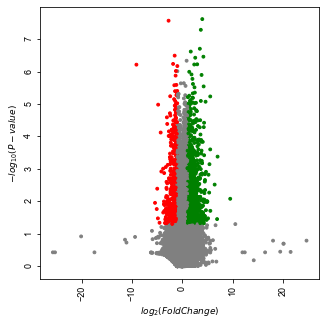

In [8]:
#pip install bioinfokit
#pip install rnalysis
import pandas as pd
from rnalysis import filtering
pdf=pd.read_csv("GSE113857_TPM_matrix.txt", sep='\t', header=0)
#print(pdf)
pdf.to_csv("raw_data.csv")

import bioinfokit
import math
from bioinfokit.analys import norm, get_data
import pandas as pd
import numpy as np
pdf=pd.read_csv("raw_data.csv", header=0)
#pdf.head()
trim_pdf=pdf.drop(["Unnamed: 0"], axis=1)
#trim_pdf.head()
trim_pdf = trim_pdf.set_index('GeneSymbol')
print(trim_pdf.head())
nm = norm()

trim_pdf["Mean_GFP"]=(trim_pdf["GFP-MSC1"]+trim_pdf["GFP-MSC2"]+trim_pdf["GFP-MSC3"])/3
trim_pdf["Mean_PDGFB"]=(trim_pdf["PDGFB-MSC3"]+trim_pdf["PDGFB-MSC2"]+trim_pdf["PDGFB-MSC3"])/3
#trim_pdf=trim_pdf.drop(["Mean_1"], axis=1)
trim_pdf["FC"]=trim_pdf["Mean_GFP"]/trim_pdf["Mean_PDGFB"]
#

trim_pdf=trim_pdf.replace([np.inf, -np.inf], np.nan)
trim_pdf=trim_pdf.fillna(0)
trim_pdf.head()

trim_pdf['FC'].apply(lambda x: float(x))

trim_pdf["log2FC"]=np.log2(trim_pdf["FC"])

trim_pdf["std_gfp"] = trim_pdf[["GFP-MSC1","GFP-MSC2","GFP-MSC3"]].std(ddof=0,axis=1)
trim_pdf["std_pdgfb"] = trim_pdf[["PDGFB-MSC1","PDGFB-MSC2","PDGFB-MSC3"]].std(ddof=0,axis=1)

from scipy.stats import ttest_ind
import numpy as np
pp=[]
for i in range(0,39037):
  a=[]
  b=[]
  a=trim_pdf.iloc[i,0:3]
  a=list(a)
  b=trim_pdf.iloc[i,3:6]
  b=list(b)
  stat, p= ttest_ind(a,b)
  pp.append(p);

trim_pdf["P_VAl"] = pp
trim_pdf

from bioinfokit import analys, visuz
import matplotlib 
import seaborn
visuz.gene_exp.volcano(df=trim_pdf, lfc='log2FC', pv='P_VAl', show=True)